## Introduction:

This notebook contains practice on Ch-3, related to Commulative Dirtibution Function (CDF) .. 

### Ex: 

- Build a PMF of these data and compute the mean as perceived by the Dean. Since the data have been grouped in bins, you can use the mid-point of each bin.

- Then find the distribution of class sizes as perceived by students and compute its mean.

- Write a function called UnbiasPmf that takes the PMF of the observed values and returns a new Pmf object that estimates the distribution of class sizes. You can download a solution to this problem from http://thinkstats.com/class_size.py

#### ------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [222]:
import numpy as np
import pandas as pd
import class_size
import collections
import matplotlib.pyplot as plt
from sklearn import preprocessing
%matplotlib inline

### 1. PMF computation:

Class sizes = mid point of each class .. 

I can loop the hist and calc the mid point of each class .. or even copy the mid-point directly as an input .. 

In [223]:
## Base case (in the textbook) , c is the class size, biased sampling
d = {
         7: 8, 
         12: 8, 
         17: 14, 
         22: 4, 
         27: 6, 
         32: 12, 
         37: 8, 
         42: 3, 
         47: 2, 
    }
d

{7: 8, 12: 8, 17: 14, 22: 4, 27: 6, 32: 12, 37: 8, 42: 3, 47: 2}

In [224]:
d.keys(), d.values()

([32, 17, 37, 22, 7, 42, 27, 12, 47], [12, 14, 8, 4, 8, 3, 6, 8, 2])

In [225]:
total = float(sum(d.values()))
for key in d: d[key] /= total

In [226]:
d

{7: 0.12307692307692308,
 12: 0.12307692307692308,
 17: 0.2153846153846154,
 22: 0.06153846153846154,
 27: 0.09230769230769231,
 32: 0.18461538461538463,
 37: 0.12307692307692308,
 42: 0.046153846153846156,
 47: 0.03076923076923077}

### 2. Distribution of the class sizes:

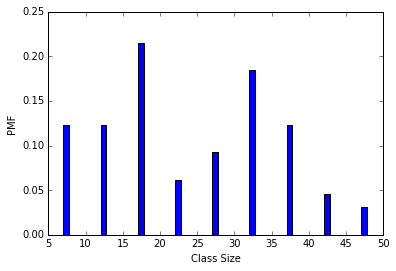

In [227]:
## discrete values ==> bar chart ..
plt.bar(d.keys(), d.values())
plt.xlabel("Class Size")
plt.ylabel("PMF")

Uniform distribtion ..

### Mean values .. 

In [228]:
def PmfMean(d):
    temp = []
    pmf = d.values()
    index = d.keys()

    for k in xrange(len(index)):
        temp.append(np.multiply(index[k],pmf[k]))
        
    return sum(temp)

In [229]:
PmfMean(d)

23.692307692307701

Mean value for the base biased case is around 24 .. this matches the results in the textbook illustrations ..

### 3. Unbiase Class size: 

The motivation behind this part is that is that ..  suppose you want to find the distribution of class sizes at a college, but you can’t get reliable data from the Dean. An alternative is to choose a random sample of students and ask them the number of students in each of their classes. Then you could compute the PMF of their responses.

However, The result would be biased because large classes would be oversampled, but you could estimate the actual distribution of class sizes by applying an appropriate transformation to the observed distribution.

Hence, oversampling results in biasness (i.e. if you ask students how big their classes are, large classes are oversampled in proportion to their size)

## Normalization:

To overcome the biasness problem .. we have to normalize the data .. 

In [236]:
X_normalized = preprocessing.normalize(d.values())
X_normalized

/usr/lib/python2.7/dist-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([[ 0.49112731,  0.57298186,  0.3274182 ,  0.1637091 ,  0.3274182 ,
         0.12278183,  0.24556365,  0.3274182 ,  0.08185455]])

In [250]:
def Normalized_PmfMean(X_normalized, keys):
    temp = []
    pmf = X_normalized
    index = keys

    for k in xrange(len(X_normalized)):
        temp = np.multiply(index[k],pmf[k])
#         print(temp.append(np.multiply(index[k],pmf[k])))
    return sum(temp)

In [251]:
key_ = d.keys()
Normalized_PmfMean(X_normalized, key_)  ## mismatch results .. might indecates wrong normalization 

85.128732943286025

## Note:
This was my own implementation .. let's confirm the results by calling the built in functions from class_size .. 

mean 23.6923076923
var 128.674556213
mean 29.1233766234
var 109.225037949
mean 23.6923076923
var 128.674556213


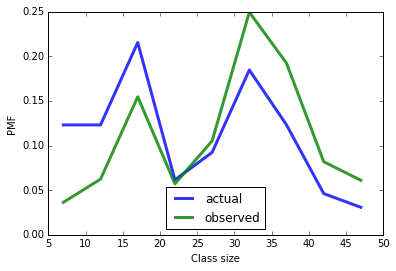

In [233]:
c_ = class_size.main
c_()  

The first stats. results are for the normal case, then biased one and finally unbiased data .. 